In [1]:
# import folium
# # 서울 시청의 위도와 경도
# seoul_cityhall = (37.5662952, 126.9779451)

# # 서울 지도 객체 생성
# seoul_map = folium.Map(location=seoul_cityhall, zoom_start=15)

# # 서울 시청 위치에 마커 추가
# folium.Marker(location=seoul_cityhall,
#               popup='서울 시청').add_to(seoul_map)

# # 경복궁 위치에 CircleMarker 추가
# gyeongbokgung = (37.5796519, 126.9770407)
# folium.CircleMarker(location=gyeongbokgung,
#                     radius=50,
#                     color='red',
#                     fill=True,
#                     fill_color='blue',
#                     fill_opacity=0.3,
#                     popup='경복궁').add_to(seoul_map)

# # HTML 파일로 저장
# seoul_map.save('seoul_map.html')

# # Jupyter Notebook에서 바로 출력
# seoul_map

<h1>자전거 대여소</h1>

<h1>서울시 공공 자전거 대여소 정보(수동으로 다운로드한 파일)</h1>

In [2]:
import pandas as pd

In [3]:
dataInFolder = './../data/'
rentInfo = pd.read_csv(dataInFolder + '공공 자전거 대여소 정보(22.06월 기준).csv', encoding='UTF-8')
rentInfo.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,설치형태LCD,설치형태QR,운영방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2022-05-03,NaN,15.0,QR
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2022-05-03,NaN,14.0,QR
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2022-05-12,NaN,13.0,QR
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,NaN,5.0,QR
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2022-05-12,NaN,12.0,QR


In [4]:
rentInfo.columns

Index(['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', '설치형태LCD', '설치형태QR',
       '운영방식'],
      dtype='object')

In [5]:
rentInfo['대여소이름'] = rentInfo['대여소번호'].astype('str') + '.' +rentInfo['대여소명']
rentInfo = rentInfo.drop(['대여소번호','대여소명'], axis=1)
rentInfo = rentInfo.set_index('대여소이름')
rentInfo.head()

,자치구,상세주소,위도,경도,설치시기,설치형태LCD,설치형태QR,운영방식
대여소이름,,,,,,,,
102.망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2022-05-03,NaN,15.0,QR
103.망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2022-05-03,NaN,14.0,QR
104.합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2022-05-12,NaN,13.0,QR
105.합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,NaN,5.0,QR
106.합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2022-05-12,NaN,12.0,QR


In [6]:
rentInfo.dtypes.to_frame().T

,자치구,상세주소,위도,경도,설치시기,설치형태LCD,설치형태QR,운영방식
0,object,object,float64,float64,object,float64,float64,object


In [7]:
result = rentInfo.groupby('자치구')['자치구']
result = result.count().sort_values(ascending=False).head()
result.to_frame()

,자치구
자치구,
송파구,209
강서구,184
강남구,159
영등포구,146
서초구,141


In [8]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')

Text(0.5, 1.0, '자치구별 대여소 개수 상위 top 5')

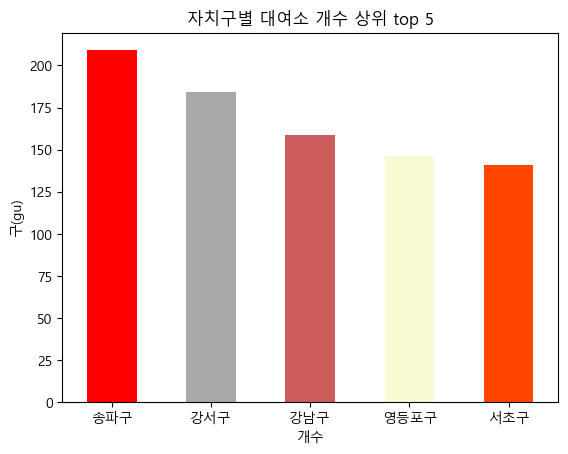

In [9]:
result.plot(kind = 'bar', grid = False, use_index = True, rot = 0 ,color = ['r','DarkGray','IndianRed','LightGoldenRodYellow','OrangeRed'])
plt.xlabel('개수')
plt.ylabel('구(gu)')
plt.title('자치구별 대여소 개수 상위 top 5')

In [10]:
rentInfo['운영방식'].unique()

array(['QR', 'LCD'], dtype=object)

In [11]:
# '운영방식'을 이용한 파이 그래프 그리기
result = rentInfo.groupby('운영방식')['운영방식']
result = result.count().sort_values(ascending=False).head()
result.to_frame()

,운영방식
운영방식,
QR,1377
LCD,1276


Text(0.5, 1.0, '운영방식')

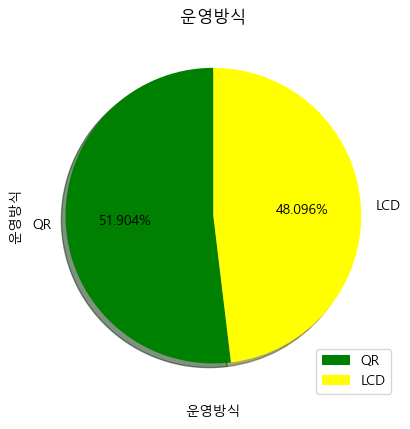

In [12]:
mylabel = result.index
mycolors = ['green', 'yellow']

result.plot(kind='pie', labels=mylabel, shadow=True, explode=(0,0),
                colors=mycolors, autopct='%1.3f%%', 
                startangle=90, counterclock=True)

plt.grid(True)
plt.legend(loc=4)
plt.xlabel(result.index.name)
plt.title(result.name)

In [13]:
# '마포구'의 '독막로'
mapogu = rentInfo[rentInfo['자치구']=='마포구']
result = mapogu['상세주소'].str.split(' ')
result = result.str.get(2)
bool = result == '독막로'
#bool
mapdata = mapogu[bool]
mapdata

,자치구,상세주소,위도,경도,설치시기,설치형태LCD,설치형태QR,운영방식
대여소이름,,,,,,,,
106.합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2022-05-12,NaN,12.0,QR
118.광흥창역 2번출구 앞,마포구,서울특별시 마포구 독막로 지하165,37.547733,126.931763,2015-09-07,NaN,10.0,QR
122.신성기사식당 앞,마포구,서울특별시 마포구 독막로 223-1,37.547459,126.938377,2015-09-07,NaN,10.0,QR
4246.상수역새마을금고,마포구,서울 마포구 독막로 8,37.547588,126.924644,2021-12-09,NaN,5.0,QR


In [14]:
import folium

In [15]:
mylocation = (37.54, 126.93)
mapObject = folium.Map(location=mylocation, zoom_start=15)

for idxname in mapdata.index :
    onedata = mapdata.loc[idxname]
#     print(onedata)
#     print()
    myposition = (onedata['위도'], onedata['경도'])
    marker = folium.Marker(myposition, popup=idxname, icon=folium.Icon(color='red',icon='info-sign')).add_to(mapObject)
# end for

mapfilename = 'map_result.html'
mapObject.save(mapfilename) # html 파일로 저장
print(mapfilename + '파일 저장 완료')

mapObject # jupyter notebook에서 바로 출력

map_result.html파일 저장 완료


<h1>서울시 공공 자전거 실시간 대여소 정보(open API로 json 데이터 가져옴)</h1>

In [16]:
dataInFolder = './../data/'
bikeList = pd.read_csv(dataInFolder + 'bikeList.csv', encoding='UTF-8', index_col=0)

bike_dict = {'rackTotCnt':'거치대개수',
            'stationName':'대여소이름',
            'parkingBikeTotCnt':'자전거주차총건수',
            'shared':'거치율',
            'stationLatitude':'위도',
            'stationLongitude':'경도',
            'stationId':'대여소ID'}

bikeList = bikeList.rename(columns=bike_dict)
bikeList.head()

,거치대개수,대여소이름,자전거주차총건수,거치율,위도,경도,대여소ID
0,15,102. 망원역 1번출구 앞,11,73,37.555649,126.910629,ST-4
1,14,103. 망원역 2번출구 앞,18,129,37.554951,126.910835,ST-5
2,13,104. 합정역 1번출구 앞,9,69,37.550629,126.914986,ST-6
3,5,105. 합정역 5번출구 앞,7,140,37.550007,126.914825,ST-7
4,12,106. 합정역 7번출구 앞,6,50,37.548645,126.912827,ST-8


In [17]:
bikeList['대여소이름'] = bikeList['대여소이름'].str.replace('. ','.', regex=False)
bikeList = bikeList.set_index('대여소이름')
bikeList.head()

,거치대개수,자전거주차총건수,거치율,위도,경도,대여소ID
대여소이름,,,,,,
102.망원역 1번출구 앞,15,11,73,37.555649,126.910629,ST-4
103.망원역 2번출구 앞,14,18,129,37.554951,126.910835,ST-5
104.합정역 1번출구 앞,13,9,69,37.550629,126.914986,ST-6
105.합정역 5번출구 앞,5,7,140,37.550007,126.914825,ST-7
106.합정역 7번출구 앞,12,6,50,37.548645,126.912827,ST-8


In [18]:
rentInfo.head()

,자치구,상세주소,위도,경도,설치시기,설치형태LCD,설치형태QR,운영방식
대여소이름,,,,,,,,
102.망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2022-05-03,NaN,15.0,QR
103.망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2022-05-03,NaN,14.0,QR
104.합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2022-05-12,NaN,13.0,QR
105.합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,NaN,5.0,QR
106.합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2022-05-12,NaN,12.0,QR


In [19]:
# '거치율'이 가장 높은 항목 5개
result = bikeList['거치율'].sort_values(ascending=False).head()
result.to_frame()

,거치율
대여소이름,
2608.송파구청,930
1054.말우물 어린이 공원,780
2525.반포쇼핑타운 2동 앞,760
1023.한국종합기술사옥 앞,682
1450.화랑대역 7번출구,670


Text(0.5, 1.0, '거치율 상위 top 5')

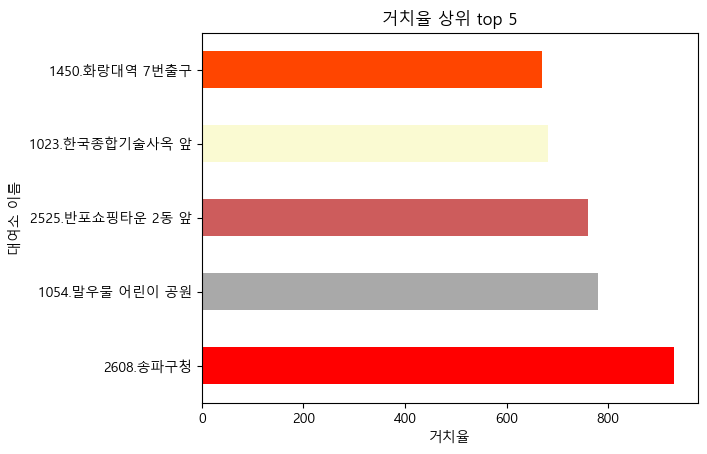

In [20]:
result.plot(kind = 'barh', grid = False, use_index = True, rot = 0 ,color = ['r','DarkGray','IndianRed','LightGoldenRodYellow','OrangeRed'])
plt.xlabel('거치율')
plt.ylabel('대여소 이름')
plt.title('거치율 상위 top 5')

In [21]:
# 두 데이터 프레임 합치기
mergedata = pd.merge(rentInfo,bikeList,left_index=True,right_index=True,how='outer',indicator=True,suffixes=('',' _right'))
mergedata = mergedata.drop(['위도 _right', '경도 _right'], axis=1)
mergedata.index.name = '대여소이름'
mergedata.columns

Index(['자치구', '상세주소', '위도', '경도', '설치시기', '설치형태LCD', '설치형태QR', '운영방식', '거치대개수',
       '자전거주차총건수', '거치율', '대여소ID', '_merge'],
      dtype='object')

In [22]:
# '자치구'별 '거치대개수'의 합 구하고, 상위 1개만 그래프 그리기
result = mergedata.groupby('자치구')['거치대개수']
result = result.sum().sort_values(ascending=False).head(10)
result.to_frame()

,거치대개수
자치구,
강서구,1805.0
송파구,1704.0
강남구,1466.0
서초구,1410.0
영등포구,1200.0
마포구,1173.0
강동구,1113.0
종로구,1068.0
구로구,996.0


Text(0.5, 1.0, '거치율 상위 top 10')

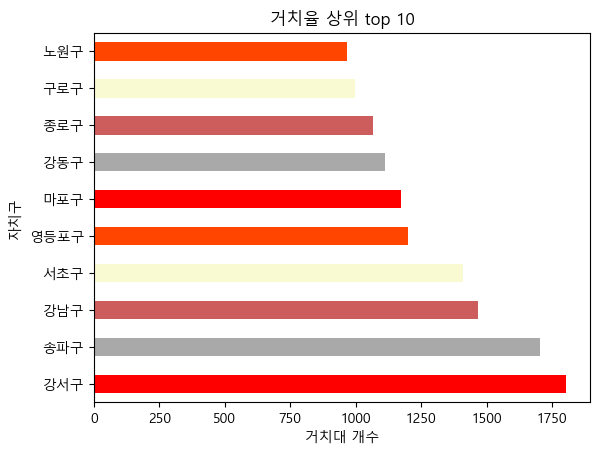

In [23]:
result.plot(kind = 'barh', grid = False, use_index = True, rot = 0 ,color = ['r','DarkGray','IndianRed','LightGoldenRodYellow','OrangeRed'])
plt.xlabel('거치대 개수')
plt.ylabel('자치구')
plt.title('거치율 상위 top 10')

<h1>서울시 공공 자전거 이용 정보(일별)</h1>

In [24]:
import pandas as pd

In [25]:
dataInFolder = './../data/'
cycleDayRent = pd.read_csv(dataInFolder + 'cycleRentUseDayInfo(20221001~20221010).csv', index_col=0, encoding='UTF-8')

day_rent_dict = {'RENT_DT':'대여일자(YYYYMMDD)',
                 'RENT_ID':'대여소번호',
                 'RENT_NM':'대여소명',
                 'RENT_TYPE':'대여구분코드',
                 'GENDER_CD':'성별',
                 'AGE_TYPE':'연령',
                 'USE_CNT':'대여건수',
                 'EXER_AMT':'운동량',
                 'CARBON_AMT':'탄소절감량',
                 'MOVE_METER':'이동거리(M)',
                 'MOVE_TIME':'이용시간(분)'}

cycleDayRent = cycleDayRent.rename(columns = day_rent_dict)
cycleDayRent['대여소명'] = cycleDayRent['대여소명'].str.replace('. ','.',regex=False)
cycleDayRent['연령'] = cycleDayRent['연령'].str.replace('~','',regex=False)
cycleDayRent['성별'] = cycleDayRent['성별'].str.upper()

cycleDayRent = cycleDayRent.set_index('대여소명')
cycleDayRent.head()

,대여일자(YYYYMMDD),대여소번호,대여구분코드,성별,연령,대여건수,운동량,탄소절감량,이동거리(M),이용시간(분),START_INDEX,END_INDEX,RNUM
대여소명,,,,,,,,,,,,,
108.서교동 사거리,2022-10-01,108,정기권,NaN,10대,1,58.21,0.49,2100.00,22,0,0,1
729.서부식자재마트 건너편,2022-10-01,729,정기권,NaN,10대,1,56.28,0.52,2256.02,16,0,0,2
729.서부식자재마트 건너편,2022-10-01,729,정기권,NaN,10대,1,50.29,0.35,1530.00,14,0,0,3
731.서울시 도로환경관리센터,2022-10-01,731,정기권,NaN,10대,2,36.84,0.40,1733.11,13,0,0,4
733.신정이펜하우스314동,2022-10-01,733,정기권,NaN,10대,2,140.22,1.19,5131.70,32,0,0,5


In [26]:
cycleDayRent.columns

Index(['대여일자(YYYYMMDD)', '대여소번호', '대여구분코드', '성별', '연령', '대여건수', '운동량', '탄소절감량',
       '이동거리(M)', '이용시간(분)', 'START_INDEX', 'END_INDEX', 'RNUM'],
      dtype='object')

In [27]:
print('행 개수 : ' +str(cycleDayRent.shape[0]))
print('행 개수 : ' +str(cycleDayRent.shape[1]))

행 개수 : 554426
행 개수 : 13


In [28]:
# '대여구분코드' 별로 그룹핑 후 파이 그래프
cycleDayRent['대여구분코드'].unique()
chartdata = cycleDayRent['대여구분코드'].value_counts()
chartdata.to_frame()

,대여구분코드
정기권,411826
일일권,129995
일일권(비회원),6808
단체권,5797


In [29]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')

Text(0.5, 1.0, '대여구분코드별 비율')

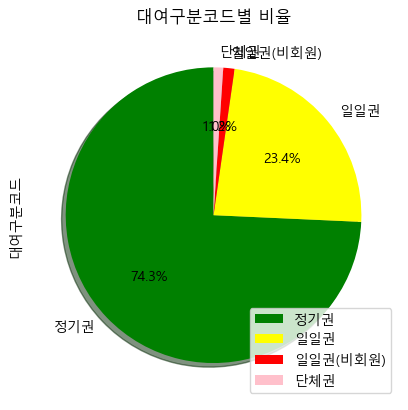

In [30]:
mylabel = chartdata.index
mycolors = ['green', 'yellow','red','pink']

chartdata.plot(kind='pie', labels=mylabel, shadow=True, explode=(0,0,0,0),
                colors=mycolors, autopct='%1.1f%%', 
                startangle=90, counterclock=True)

plt.grid(True)
plt.legend(loc=4)
plt.title(chartdata.name + '별 비율')

In [31]:
# '연령' 별로 막대 그래프
cycleDayRent['연령'].unique()
chartdata = cycleDayRent['연령'].value_counts()
chartdata.to_frame()

,연령
20대,145238
30대,117838
40대,86657
기타,67242
50대,63544
10대,46083
60대,23955
70대이상,3869


Text(0.5, 1.0, '연령별 빈도 수')

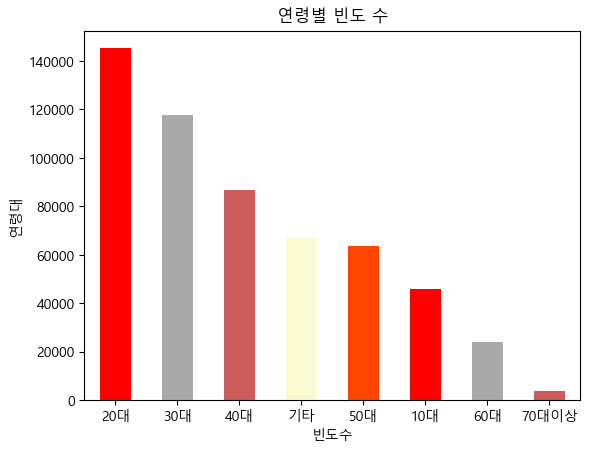

In [32]:
chartdata.plot(kind = 'bar', grid = False, use_index = True, rot = 0 ,color = ['r','DarkGray','IndianRed','LightGoldenRodYellow','OrangeRed'])
plt.xlabel('빈도수')
plt.ylabel('연령대')
plt.title('연령별 빈도 수')

In [33]:
# '성별', '연령', '대여구분코드', '이동거리(M)' 를 이용한 pivoting하기
# '연령'에서 기타 항목은 제외하도록 합니다.
concern = ['성별', '연령', '대여구분코드', '이동거리(M)']
concernData = cycleDayRent[concern]

print('성별 before delete :' +str(len(concernData)))
concernData = concernData.dropna(subset=['성별'])
print('성별 after delete :' +str(len(concernData)))

concernData = concernData[concernData['연령'] != '기타']
print('\'연령\' != \'기타\' after delete : ' +str(len(concernData)))

concernData.head()

성별 before delete :554426
성별 after delete :378880
'연령' != '기타' after delete : 332209


,성별,연령,대여구분코드,이동거리(M)
대여소명,,,,
108.서교동 사거리,F,10대,정기권,1516.26
729.서부식자재마트 건너편,F,10대,정기권,4055.28
731.서울시 도로환경관리센터,F,10대,정기권,11587.79
732.신월중학교,F,10대,정기권,1300.00
735.영도초등학교,F,10대,정기권,9226.32


In [34]:
pivotData = concernData.pivot_table(index=['성별','연령'], columns='대여구분코드', values='이동거리(M)', aggfunc='mean')
pivotData = pivotData.fillna(value={'일일권(비회원)':0}, axis=0, inplace=False)

pivotData

대여구분코드             단체권          일일권  일일권(비회원)          정기권
성별 연령                                                     
F  10대     8800.410035  4903.398185     0.000  3055.783759
   20대     7834.879831  7492.345648  2967.670  6094.173092
   30대     8775.349878  5771.525342     0.000  5357.571016
   40대     9369.155835  5402.768415  2790.000  4667.429191
   50대     9357.265135  5374.066194     0.000  4459.046040
   60대     8310.605000  5536.686729     0.000  3739.441821
   70대이상   9287.307500  4486.356835     0.000  2715.812293
M  10대     8911.495179  5506.685175     0.000  4021.409165
   20대     7353.405556  7235.073117  1536.610  6485.835617
   30대     8816.317595  5889.124633     0.000  6259.416419
   40대    12497.670090  5222.985563  4825.195  5778.368979
   50대    10956.392538  5063.702128     0.000  5041.680593
   60대    12182.350000  5097.533594     0.000  3891.210257
   70대이상  15011.655000  5191.162818     0.000  3188.879692

In [35]:
# MultiIndex를 SingleIndex로 변경하기
outer_index = pivotData.index.get_level_values(0)
outer_index = pd.Index(['여자' if idx=='F' else '남자' for idx in outer_index])

inner_index = pivotData.index.get_level_values(1)

newindex = outer_index + '_' + inner_index
pivotData.index = newindex
pivotData

대여구분코드,단체권,일일권,일일권(비회원),정기권
여자_10대,8800.410035,4903.398185,0.000,3055.783759
여자_20대,7834.879831,7492.345648,2967.670,6094.173092
여자_30대,8775.349878,5771.525342,0.000,5357.571016
여자_40대,9369.155835,5402.768415,2790.000,4667.429191
여자_50대,9357.265135,5374.066194,0.000,4459.046040
여자_60대,8310.605000,5536.686729,0.000,3739.441821
여자_70대이상,9287.307500,4486.356835,0.000,2715.812293
남자_10대,8911.495179,5506.685175,0.000,4021.409165
남자_20대,7353.405556,7235.073117,1536.610,6485.835617
남자_30대,8816.317595,5889.124633,0.000,6259.416419


In [36]:
# '일일권' 컬럼에 '일일권(비회원)'을 누적하고, '일일권(비회원)' 컬럼은 삭제합니다.

pivotData['일일권'] = pivotData['일일권'] + pivotData['일일권(비회원)']
pivotData = pivotData.drop('일일권(비회원)', axis=1)
pivotData

대여구분코드,단체권,일일권,정기권
여자_10대,8800.410035,4903.398185,3055.783759
여자_20대,7834.879831,10460.015648,6094.173092
여자_30대,8775.349878,5771.525342,5357.571016
여자_40대,9369.155835,8192.768415,4667.429191
여자_50대,9357.265135,5374.066194,4459.046040
여자_60대,8310.605000,5536.686729,3739.441821
여자_70대이상,9287.307500,4486.356835,2715.812293
남자_10대,8911.495179,5506.685175,4021.409165
남자_20대,7353.405556,8771.683117,6485.835617
남자_30대,8816.317595,5889.124633,6259.416419


In [37]:
womanidx = [item for item in pivotData.index if item.startswith('여자')]
woman = pivotData.loc[womanidx]
woman # 여자들 정보

대여구분코드,단체권,일일권,정기권
여자_10대,8800.410035,4903.398185,3055.783759
여자_20대,7834.879831,10460.015648,6094.173092
여자_30대,8775.349878,5771.525342,5357.571016
여자_40대,9369.155835,8192.768415,4667.429191
여자_50대,9357.265135,5374.066194,4459.046040
여자_60대,8310.605000,5536.686729,3739.441821
여자_70대이상,9287.307500,4486.356835,2715.812293


Text(0, 0.5, '평균')

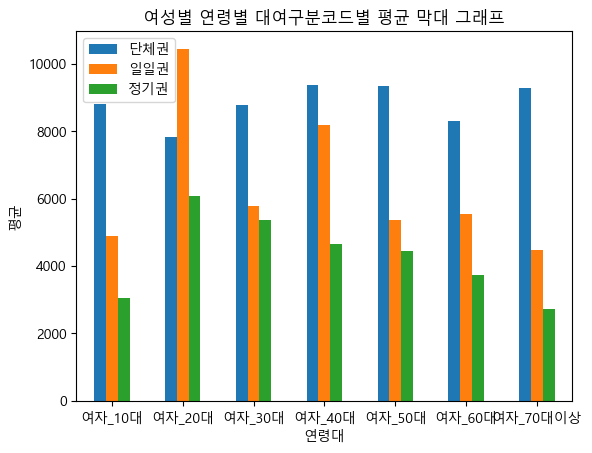

In [38]:
# '여성별' '연령별' '대여구분코드'별 평균 막대 그래프
woman.plot(kind='bar', rot=0, title='여성별 연령별 대여구분코드별 평균 막대 그래프', legend=True)

plt.legend(loc='best')
plt.xlabel('연령대')
plt.ylabel('평균')

Text(0, 0.5, '평균')

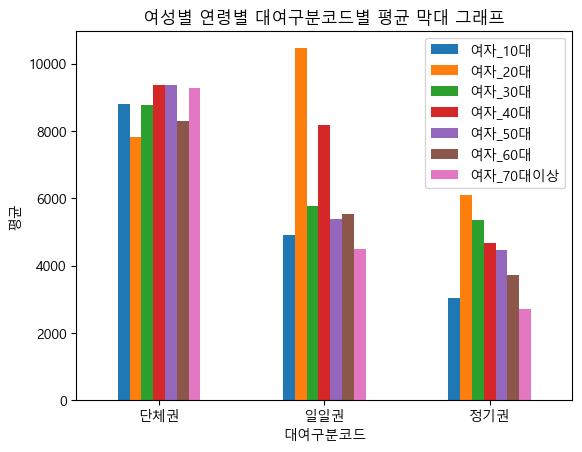

In [39]:
# 행과 열을 전치하여 그리기
woman.T.plot(kind='bar', rot=0, title='여성별 연령별 대여구분코드별 평균 막대 그래프', legend=True)

plt.legend(loc='best')
plt.xlabel('대여구분코드')
plt.ylabel('평균')

In [41]:
# 데이터 프레임 병합하기

mergedata02 = pd.merge(rentInfo,cycleDayRent,left_index=True,right_index=True,how='outer',indicator=True,suffixes=('',' _right'))
# mergedata02 = mergedata02.drop(['위도 _right', '경도 _right'], axis=1)
# mergedata02.index.name = '대여소이름'
mergedata02.columns

Index(['자치구', '상세주소', '위도', '경도', '설치시기', '설치형태LCD', '설치형태QR', '운영방식',
       '대여일자(YYYYMMDD)', '대여소번호', '대여구분코드', '성별', '연령', '대여건수', '운동량', '탄소절감량',
       '이동거리(M)', '이용시간(분)', 'START_INDEX', 'END_INDEX', 'RNUM', '_merge'],
      dtype='object')

In [42]:
# '자치구'별 '대여구분코드'별로 '대여건수'의 총합 구하기

concern = ['자치구','대여구분코드','대여건수']
bikeData = mergedata02[concern]
bikeData.head()

,자치구,대여구분코드,대여건수
1001.광진교 남단 사거리(천호공원 방면),강동구,정기권,11.0
1001.광진교 남단 사거리(천호공원 방면),강동구,정기권,6.0
1001.광진교 남단 사거리(천호공원 방면),강동구,정기권,1.0
1001.광진교 남단 사거리(천호공원 방면),강동구,정기권,4.0
1001.광진교 남단 사거리(천호공원 방면),강동구,정기권,2.0


In [44]:
groupedData = bikeData.groupby(['자치구','대여구분코드'])['대여건수']
result = groupedData.sum().to_frame().reset_index()
result = result.sort_values(by=['자치구','대여건수'],ascending=[True,False])
result.head(20)

,자치구,대여구분코드,대여건수
3,강남구,정기권,23126.0
1,강남구,일일권,6596.0
2,강남구,일일권(비회원),452.0
0,강남구,단체권,407.0
7,강동구,정기권,39073.0
5,강동구,일일권,8602.0
4,강동구,단체권,507.0
6,강동구,일일권(비회원),387.0
11,강북구,정기권,10237.0
9,강북구,일일권,2156.0


In [46]:
# 각 '자치구'별로 '대여구분코드'의 최대 값을 구해봅니다.
result = result.drop_duplicates(subset=['자치구'])
result.head()

,자치구,대여구분코드,대여건수
3,강남구,정기권,23126.0
7,강동구,정기권,39073.0
11,강북구,정기권,10237.0
15,강서구,정기권,111194.0
19,관악구,정기권,23003.0


In [47]:
result['대여구분코드'].value_counts()
# 모든 자치구에서 정기권으로 구매를 많이 했습니다

정기권    25
Name: 대여구분코드, dtype: int64